<a href="https://colab.research.google.com/github/rabnawaz172/ET/blob/main/ET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files

# Use the following command to upload a file from your computer
uploaded = files.upload()

Saving ET_Riaz_5.csv to ET_Riaz_5 (1).csv


Library

In [35]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy
from sklearn.tree import DecisionTreeRegressor


Import Data

In [36]:
import pandas as pd

# Assuming you uploaded a CSV file named 'my_dataset.csv'
file_name = 'ET_Riaz_5.csv'

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name)

# Now, you can work with the DataFrame 'df' as you would with any other pandas DataFrame.

sns.set_theme(style="white", font_scale=1.5)
# Load the example planets dataset
df1=df.drop(['Day','Month','Year'],axis=1)
column_order = ['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn', 'ETo']
df1 = df1[column_order]
df1


,Tx,Tn,RH,u(x),Rs,e(a),e(s),u2,Ra,n,N,Rnl,Rn,ETo
0,22.5,3.3,22.6,1.79,17.38,0.336,1.750,1.79,22.98,10.48,10.48,8.47,4.92,3.5
1,22.1,5.2,33.9,2.51,17.67,0.530,1.772,2.51,23.03,10.49,10.49,7.94,5.57,3.9
2,22.6,5.4,44.6,4.12,16.51,0.713,1.820,4.12,23.08,9.76,10.49,6.82,5.90,4.5
3,20.5,6.3,51.7,1.36,16.48,0.795,1.683,1.36,23.14,9.71,10.50,6.51,6.18,2.6
4,20.6,5.2,41.1,2.48,15.71,0.612,1.656,2.48,23.20,8.98,10.51,6.46,5.64,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,23.64,1.511,2.635,1.76,35.08,10.29,12.13,5.20,13.00,4.7
8121,27.0,11.5,51.1,2.09,24.36,1.141,2.461,2.09,35.22,10.74,12.16,6.00,12.76,5.1
8122,27.6,10.9,40.5,1.85,24.81,0.904,2.498,1.85,35.37,11.00,12.18,6.65,12.45,5.3
8123,29.8,12.5,42.8,2.95,22.98,1.074,2.822,2.95,35.51,9.69,12.21,5.74,11.96,6.2


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
df3=df1.drop(['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn'],axis=1)
y=df3
y
X=df1.drop(['ETo'],axis=1)
X


,Tx,Tn,RH,u(x),Rs,e(a),e(s),u2,Ra,n,N,Rnl,Rn
0,22.5,3.3,22.6,1.79,17.38,0.336,1.750,1.79,22.98,10.48,10.48,8.47,4.92
1,22.1,5.2,33.9,2.51,17.67,0.530,1.772,2.51,23.03,10.49,10.49,7.94,5.57
2,22.6,5.4,44.6,4.12,16.51,0.713,1.820,4.12,23.08,9.76,10.49,6.82,5.90
3,20.5,6.3,51.7,1.36,16.48,0.795,1.683,1.36,23.14,9.71,10.50,6.51,6.18
4,20.6,5.2,41.1,2.48,15.71,0.612,1.656,2.48,23.20,8.98,10.51,6.46,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,23.64,1.511,2.635,1.76,35.08,10.29,12.13,5.20,13.00
8121,27.0,11.5,51.1,2.09,24.36,1.141,2.461,2.09,35.22,10.74,12.16,6.00,12.76
8122,27.6,10.9,40.5,1.85,24.81,0.904,2.498,1.85,35.37,11.00,12.18,6.65,12.45
8123,29.8,12.5,42.8,2.95,22.98,1.074,2.822,2.95,35.51,9.69,12.21,5.74,11.96


**TRaining and Evalaution of All Models With complete Feature Set X_13**

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming you have already defined df1, df3, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results for each model
results = {}

# Convert X_train to a NumPy array to simplify indexing
X_train_np = X_train.to_numpy()

# Perform 10-fold cross-validation for each model
for model_name, model in [('RFR_X13', random_forest_model), ('XGBR_X13', xgb_model), ('LGBMR_X13', lgbm_model), ('DTR_X13', decision_tree_model)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model
    results[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the tr

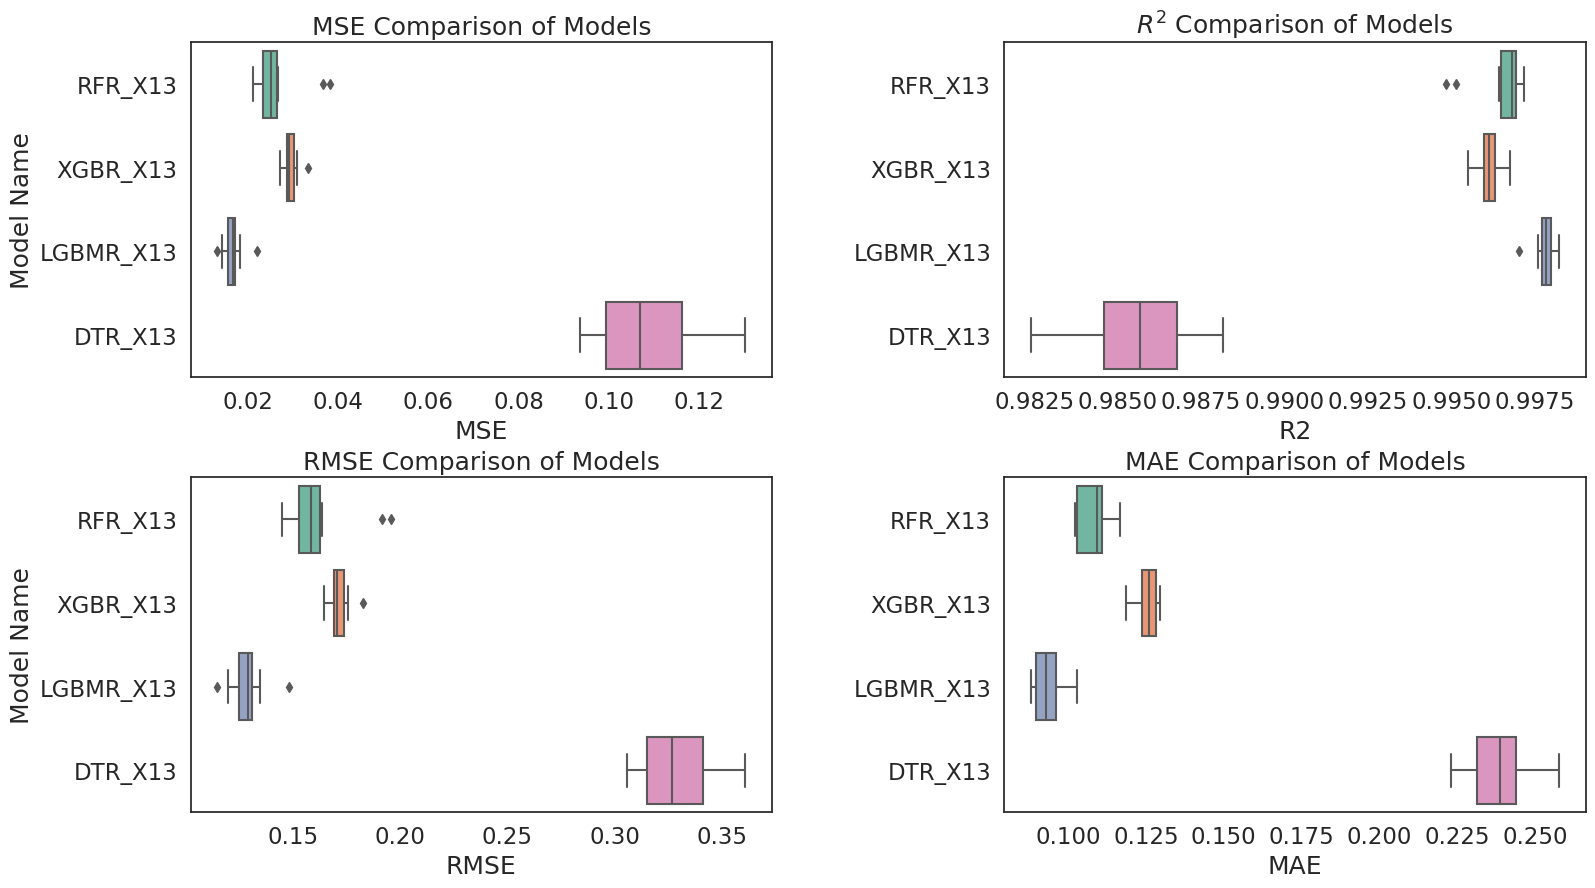

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the results dictionary for easy plotting
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better visualization
results_df = results_df.transpose()

# Define the metrics you want to compare
metrics_to_compare = ['MSE', 'R2', 'RMSE', 'MAE']

# Create a 2x2 grid of subplots with increased vertical and horizontal spacing
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)  # Adjust vertical and horizontal spacing

# Iterate through metrics and assign each subplot
for i, metric in enumerate(metrics_to_compare):
    row, col = i // 2, i % 2  # Calculate the row and column index
    ax = sns.boxplot(data=results_df[metric], orient="h", palette="Set2", ax=axes[row, col])

    # Set the title with "R²" using LaTeX formatting
    if metric == 'R2':
        ax.set_title(r'$R^2$ Comparison of Models')
    else:
        ax.set_title(f'{metric} Comparison of Models')

    ax.set_xlabel(metric)

    # Set y-axis labels as associated model names with subscripts
    model_names = results_df.index.tolist()
    ax.set_yticklabels(model_names)  # Use the original model names

    # Label the y-axis as "Model Name" only for the leftmost plots
    if col == 0:
        ax.set_ylabel("Model Name")

    # Convert values to strings and add model names to the box plot
    for j, (val, model_name) in enumerate(zip(results_df[metric], model_names)):
        if isinstance(val, (int, float)):
            ax.text(val, j, model_name, va='center', ha='left')  # Use the original model names

# Remove the y-axis label from the rightmost plots
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

# Save the plot as an image file with 300 DPI resolution
plt.savefig("model_comp_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


PLot These Results

LIGHTLGBM MOst Accurate MOdel TRain IT again to Extract Feature Importance

In [41]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Calculate performance metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate performance metrics for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the performance metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R-squared (R2): {train_r2}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print("\n")
print("Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R-squared (R2): {test_r2}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Error (MAE): {test_mae}")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
Training Set Metrics:
Mean Squared Error (MSE): 0.006707032067658265
R-squared (R2): 0.9991230027058838
Root Mean Squared Error (RMSE): 0.08189647164352237
Mean Absolute Error (MAE): 0.06287023545488446


Testing Set Metrics:
Mean Squared Error (MSE): 0.018215086334977235
R-squared (R2): 0.997796943310868
Root Mean Squared Error (RMSE): 0.1349632777275998
Mean Absolute Error (MAE): 0.09570006145710151


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554


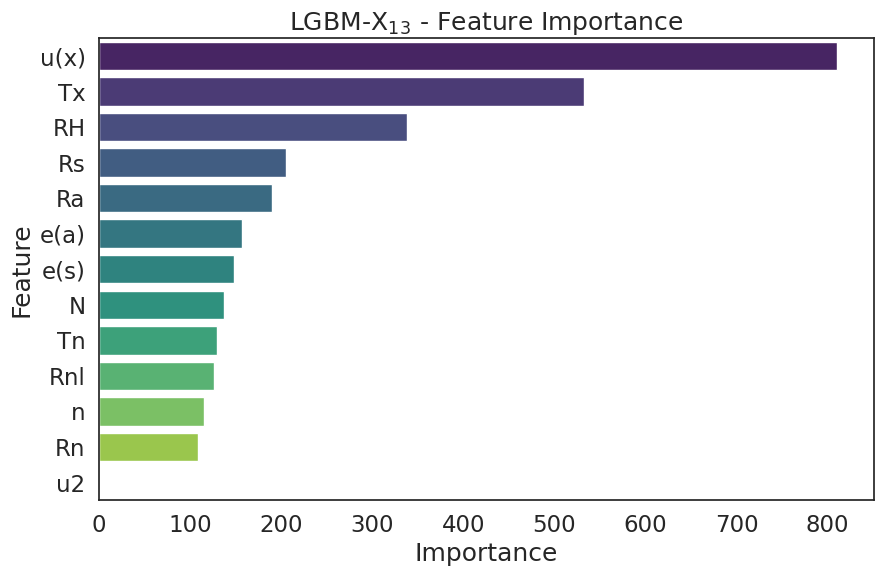

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [42]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("LGBM-X$_1$$_3$ - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
plt.savefig("model_features.png", dpi=300, bbox_inches="tight")

# Download the saved image file from Colab
files.download("model_features.png")


In [43]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List to store selected features incrementally
selected_features = []

# Lists to store evaluation metric results
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []  # Add MAPE scores
mse_scores = []   # Add MSE scores

# Train the model incrementally with the top important features
for _, row in feature_importance_df.iterrows():
    selected_features.append(row['Feature'])
    X_train_selected = X_train[selected_features]

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test[selected_features])

    # Calculate RMSE, R-squared (R2), MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Append results to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)  # Append MAPE scores
    mse_scores.append(mse)    # Append MSE scores

# Print results for each incremental feature set
for i, (feature, rmse, r2, mae, mape, mse) in enumerate(zip(selected_features, rmse_scores, r2_scores, mae_scores, mape_scores, mse_scores), start=1):
    print(f"Features selected: {i}")
    print(f"Selected Feature: {feature}")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R2): {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape:.2f}%")  # Display MAPE as a percentage
    print(f"MSE: {mse}")
    print("\n")



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start t

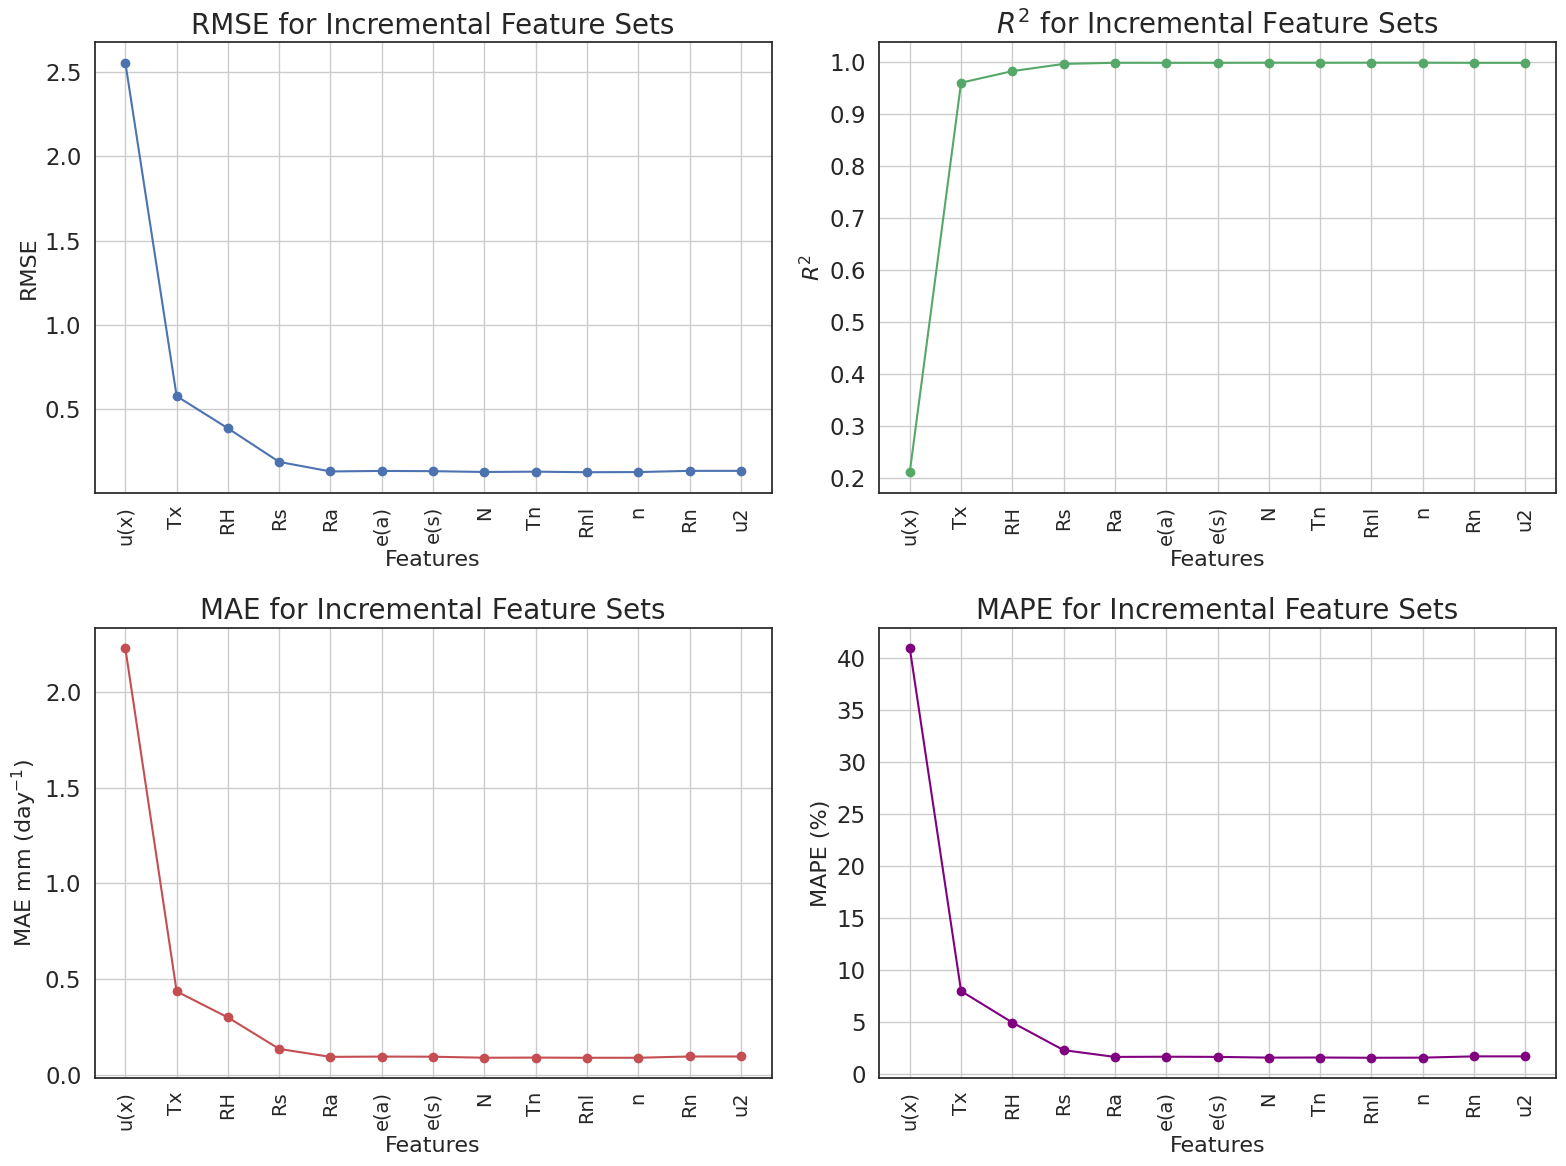

In [45]:
import matplotlib.pyplot as plt

# Increase the font size for better readability
plt.rcParams.update({'font.size': 18})

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot RMSE for each incremental feature set
axs[0, 0].plot(selected_features, rmse_scores, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('RMSE for Incremental Feature Sets', fontsize=20)  # Increase title font size
axs[0, 0].set_xlabel('Features', fontsize=16)  # Increase x-axis label font size
axs[0, 0].set_ylabel('RMSE', fontsize=16)  # Increase y-axis label font size
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=14)  # Increase tick label font size
axs[0, 0].grid(True)

# Plot R-squared (R²) for each incremental feature set with superscript
axs[0, 1].plot(selected_features, r2_scores, marker='o', linestyle='-', color='g')
axs[0, 1].set_title('$R^2$ for Incremental Feature Sets', fontsize=20)
axs[0, 1].set_xlabel('Features', fontsize=16)
axs[0, 1].set_ylabel('$R^2$', fontsize=16)
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=14)
axs[0, 1].grid(True)

# Plot MAE for each incremental feature set
axs[1, 0].plot(selected_features, mae_scores, marker='o', linestyle='-', color='r')
axs[1, 0].set_title('MAE for Incremental Feature Sets', fontsize=20)
axs[1, 0].set_xlabel('Features', fontsize=16)
axs[1, 0].set_ylabel('MAE mm (day$^{-1}$)', fontsize=16)
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=14)
axs[1, 0].grid(True)

# Plot MAPE for each incremental feature set
axs[1, 1].plot(selected_features, mape_scores, marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('MAPE for Incremental Feature Sets', fontsize=20)
axs[1, 1].set_xlabel('Features', fontsize=16)
axs[1, 1].set_ylabel('MAPE (%)', fontsize=16)
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=14)
axs[1, 1].grid(True)

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

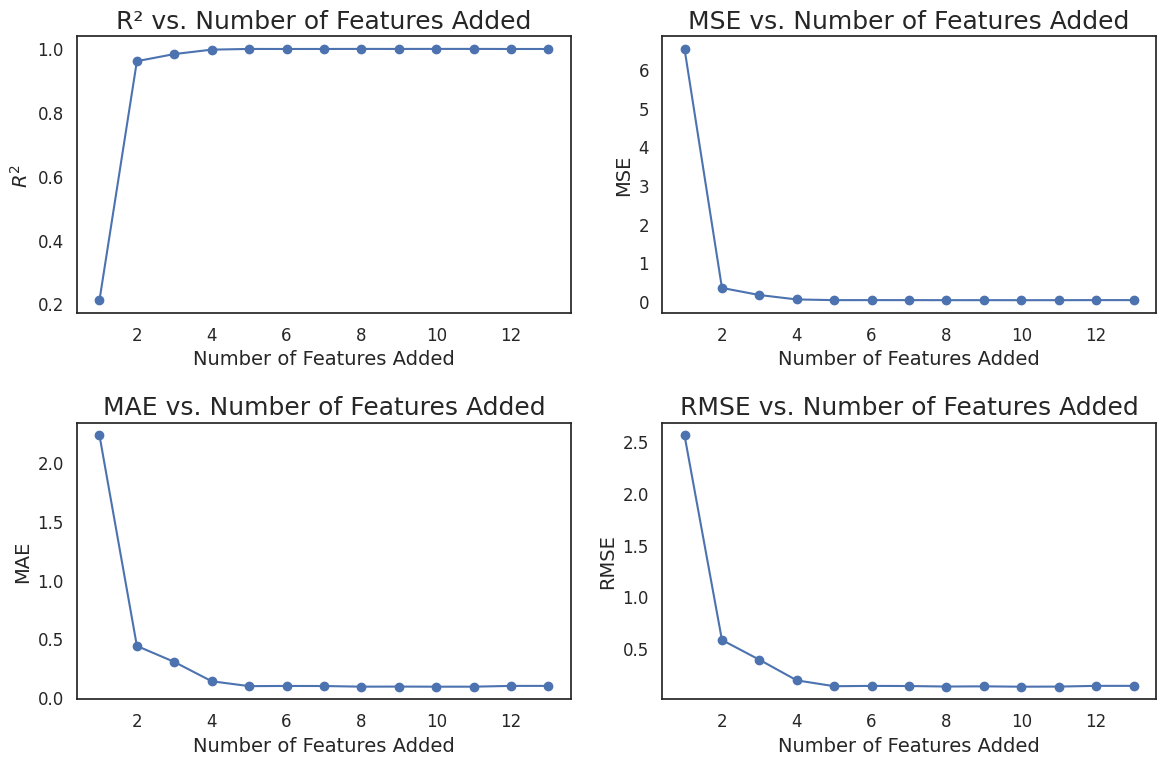

In [47]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from google.colab import files  # Import the files module

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List to store selected features incrementally
selected_features = []

# Lists to store evaluation metric results
r2_scores = []  # Moved R2 to the first place
mse_scores = []
mae_scores = []
rmse_scores = []  # Added RMSE

# Train the model incrementally with the top important features
for _, row in feature_importance_df.iterrows():
    selected_features.append(row['Feature'])
    X_train_selected = X_train[selected_features]

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test[selected_features])

    # Calculate R-squared (R2), MSE, MAE, and RMSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append results to the respective lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Create a 2x2 grid of subplots with increased font size and tick size
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Plot R-squared (R²) vs. Number of Features Added (Now in the first position)
axes[0, 0].plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', linestyle='-')
axes[0, 0].set_title('R² vs. Number of Features Added')
axes[0, 0].set_xlabel('Number of Features Added')
axes[0, 0].set_ylabel(r'$R^2$')
axes[0, 0].grid(True, color='white')  # Add white grid

# Plot MSE vs. Number of Features Added
axes[0, 1].plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='-')
axes[0, 1].set_title('MSE vs. Number of Features Added')
axes[0, 1].set_xlabel('Number of Features Added')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].grid(True, color='white')  # Add white grid

# Plot MAE vs. Number of Features Added
axes[1, 0].plot(range(1, len(mae_scores) + 1), mae_scores, marker='o', linestyle='-')
axes[1, 0].set_title('MAE vs. Number of Features Added')
axes[1, 0].set_xlabel('Number of Features Added')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(True, color='white')  # Add white grid

# Plot RMSE vs. Number of Features Added
axes[1, 1].plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='-')
axes[1, 1].set_title('RMSE vs. Number of Features Added')
axes[1, 1].set_xlabel('Number of Features Added')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].grid(True, color='white')  # Add white grid

plt.tight_layout()

# Save the image as 'model_evaluation.png'
plt.savefig('model_evaluation.png', bbox_inches='tight')

# Use the Colab files module to download the image with a browse option
files.download('model_evaluation.png')

# Display the image in Colab
plt.show()


Traine with 1-4 features and compare with all

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

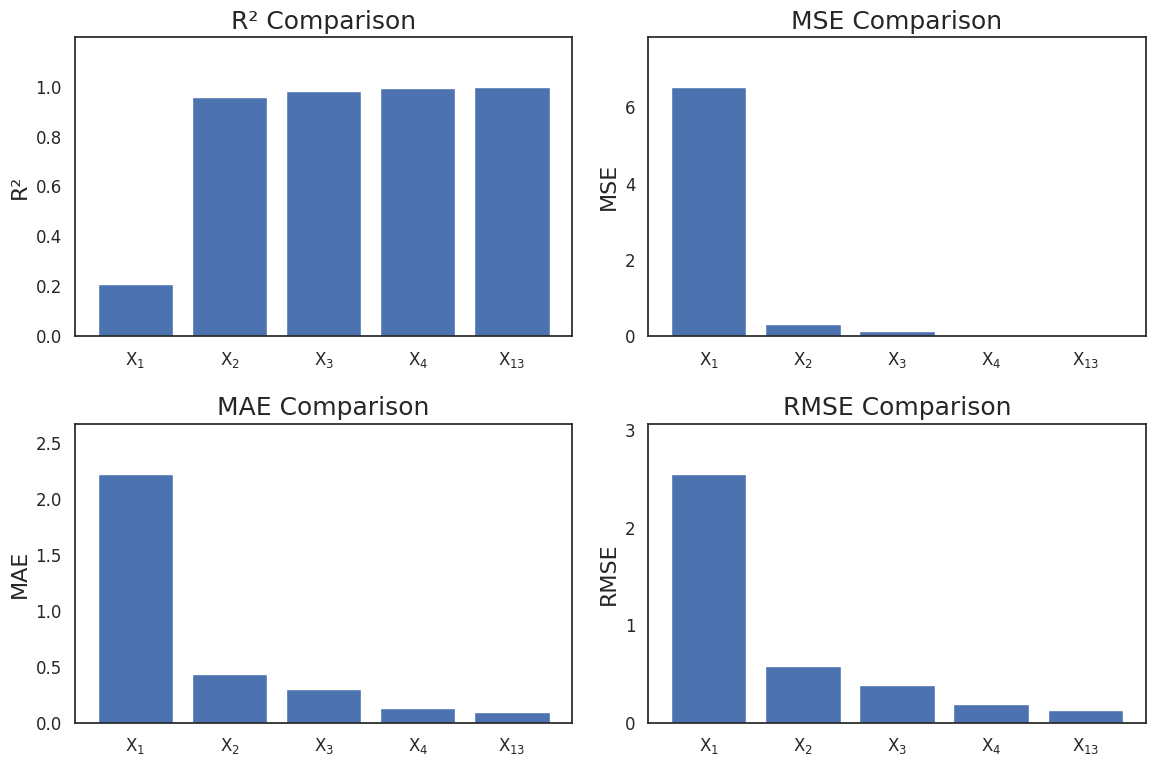

In [48]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from google.colab import files  # Import the files module

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List to store selected features incrementally
selected_features = []

# Lists to store evaluation metric results for different feature subsets
all_features_metrics = {'R²': [], 'MSE': [], 'MAE': [], 'RMSE': []}
subset_metrics = {'R²': [], 'MSE': [], 'MAE': [], 'RMSE': []}

# Train the model incrementally with the top important features (1 to 4)
for num_features in range(1, 5):
    selected_features = feature_importance_df['Feature'][:num_features]
    X_train_selected = X_train[selected_features]

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test[selected_features])

    # Calculate R-squared (R²), MSE, MAE, and RMSE for the subset
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append results to the subset metrics dictionary
    subset_metrics['R²'].append(r2)
    subset_metrics['MSE'].append(mse)
    subset_metrics['MAE'].append(mae)
    subset_metrics['RMSE'].append(rmse)

# Train the model using all features
lgbm_model.fit(X_train, y_train)
y_pred_all = lgbm_model.predict(X_test)

# Calculate R-squared (R²), MSE, MAE, and RMSE using all features
r2_all = r2_score(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
rmse_all = np.sqrt(mse_all)

# Append results to the all features metrics dictionary
all_features_metrics['R²'].append(r2_all)
all_features_metrics['MSE'].append(mse_all)
all_features_metrics['MAE'].append(mae_all)
all_features_metrics['RMSE'].append(rmse_all)

# Plot bar charts for each evaluation metric
metric_names = ['R²', 'MSE', 'MAE', 'RMSE']
num_subsets = range(1, 5)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.rc('axes', labelsize=20)  # Increase the font size of labels
plt.rc('xtick', labelsize=16)  # Increase the font size of X ticks
plt.rc('ytick', labelsize=16)  # Increase the font size of Y ticks

for i, metric_name in enumerate(metric_names):
    ax = axes[i // 2, i % 2]

    # Reorder labels and values to move "All Features" to the end
    labels = [f'X$_{{{k}}}$' for k in num_subsets] + ['X$_{13}$']
    values = subset_metrics[metric_name] + [all_features_metrics[metric_name][0]]

    ax.bar(labels, values)
    ax.set_title(f'{metric_name} Comparison', fontsize=18)  # Increase title font size
    ax.set_ylabel(metric_name, fontsize=16)  # Increase Y label font size
    ax.set_ylim(0, max(all_features_metrics[metric_name][0], max(subset_metrics[metric_name])) * 1.2)

    # Rotate X-labels for better readability
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()

# Save the image with higher DPI (dots per inch) for better resolution
plt.savefig('model_evaluation_high_resolution.png', dpi=300, bbox_inches='tight')

# Use the Colab files module to download the high-resolution image with a browse option
files.download('model_evaluation_high_resolution.png')

# Display the image in Colab
plt.show()


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

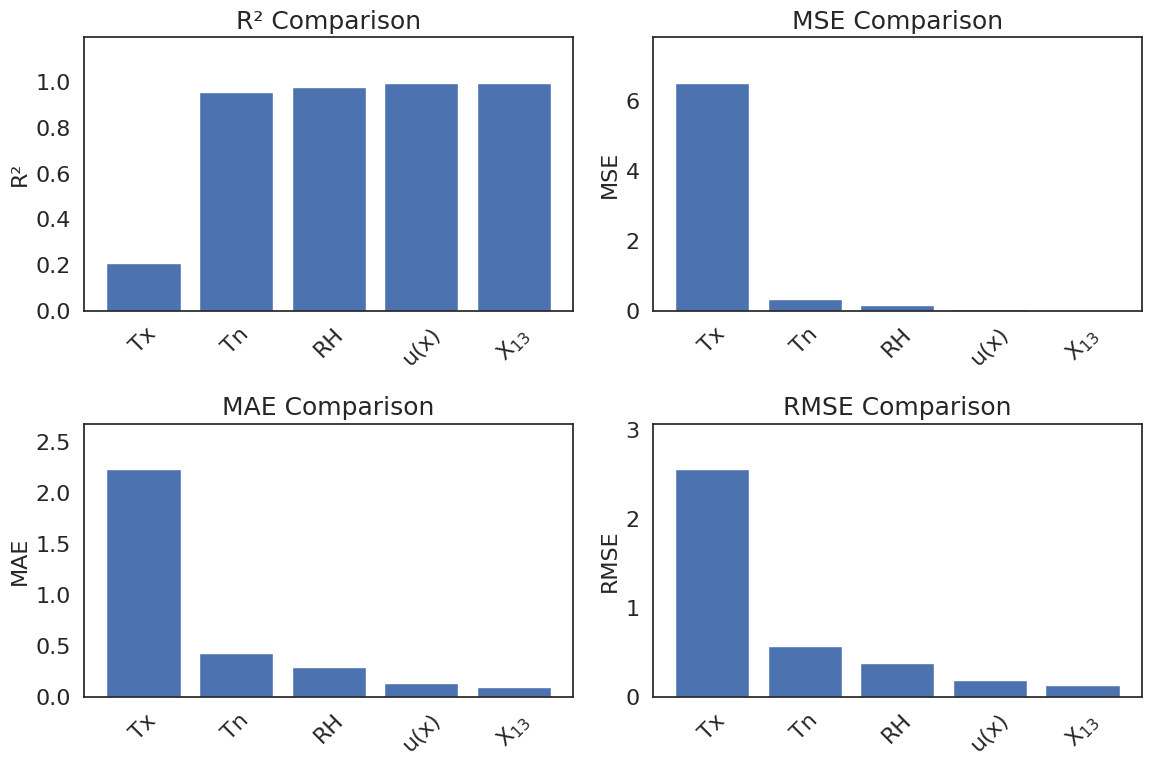

In [50]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from google.colab import files  # Import the files module

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List to store selected features incrementally
selected_features = []

# Lists to store evaluation metric results for different feature subsets
all_features_metrics = {'R²': [], 'MSE': [], 'MAE': [], 'RMSE': []}
subset_metrics = {'R²': [], 'MSE': [], 'MAE': [], 'RMSE': []}

# Train the model incrementally with the top important features (1 to 4)
for num_features in range(1, 5):
    selected_features = feature_importance_df['Feature'][:num_features]
    X_train_selected = X_train[selected_features]

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test[selected_features])

    # Calculate R-squared (R²), MSE, MAE, and RMSE for the subset
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append results to the subset metrics dictionary
    subset_metrics['R²'].append(r2)
    subset_metrics['MSE'].append(mse)
    subset_metrics['MAE'].append(mae)
    subset_metrics['RMSE'].append(rmse)

# Train the model using all features
lgbm_model.fit(X_train, y_train)
y_pred_all = lgbm_model.predict(X_test)

# Calculate R-squared (R²), MSE, MAE, and RMSE using all features
r2_all = r2_score(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
rmse_all = np.sqrt(mse_all)

# Append results to the all features metrics dictionary
all_features_metrics['R²'].append(r2_all)
all_features_metrics['MSE'].append(mse_all)
all_features_metrics['MAE'].append(mae_all)
all_features_metrics['RMSE'].append(rmse_all)

# Plot bar charts for each evaluation metric
metric_names = ['R²', 'MSE', 'MAE', 'RMSE']
num_subsets = range(1, 5)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.rc('axes', labelsize=20)  # Increase the font size of labels
plt.rc('xtick', labelsize=16)  # Increase the font size of X ticks
plt.rc('ytick', labelsize=16)  # Increase the font size of Y ticks

for i, metric_name in enumerate(metric_names):
    ax = axes[i // 2, i % 2]

    # Reorder labels and values to move "All Features" to the end
    labels = [f'{feature_names[i]}' for i in range(4)] + ['X$_{13}$']
    values = subset_metrics[metric_name] + [all_features_metrics[metric_name][0]]

    ax.bar(labels, values)
    ax.set_title(f'{metric_name} Comparison', fontsize=18)  # Increase title font size
    ax.set_ylabel(metric_name, fontsize=16)  # Increase Y label font size
    ax.set_ylim(0, max(all_features_metrics[metric_name][0], max(subset_metrics[metric_name])) * 1.2)

    # Rotate X-labels for better readability
    ax.tick_params(axis='x', rotation=45)  # Increase rotation angle

plt.tight_layout()

# Save the image with higher DPI (dots per inch) for better resolution
plt.savefig('model_evaluation_high_resolution_2.png', dpi=300, bbox_inches='tight')

# Use the Colab files module to download the high-resolution image with a browse option
files.download('model_evaluation_high_resolution_2.png')

# Display the image in Colab
plt.show()


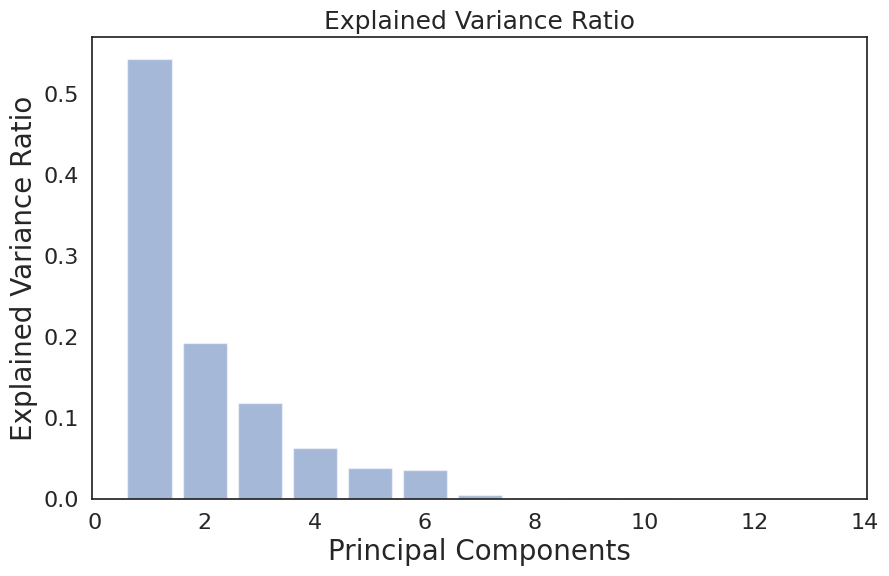

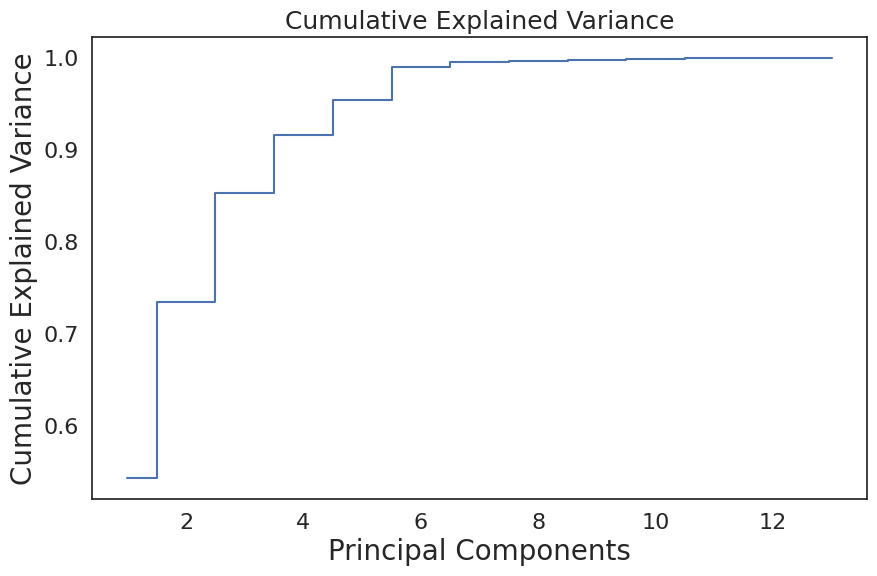

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'X' with all your features
# First, you should standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want
pca = PCA(n_components=len(X.columns))  # You can reduce this number based on your needs

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Increase font size of labels and ticks
plt.rcParams.update({'font.size': 14})

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')

# Save the figure to your hard disk
plt.savefig('explained_variance_ratio.png', bbox_inches='tight', dpi=300)

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance, where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

# Save the figure to your hard disk
plt.savefig('cumulative_explained_variance.png', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()

# Optionally, you can also download the figures using Python code:
from google.colab import files

# Download the Explained Variance Ratio plot
files.download('explained_variance_ratio.png')

# Download the Cumulative Explained Variance plot
files.download('cumulative_explained_variance.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

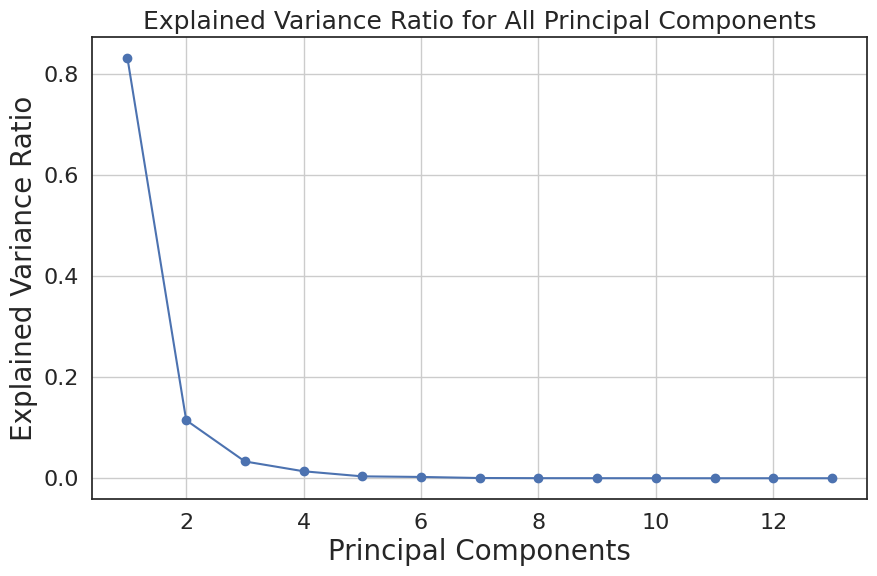

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Create a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Increase the font size
plt.rcParams.update({'font.size': 18})

# Plot the explained variance ratio for all components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for All Principal Components')

# Enable grid lines
plt.grid(True)

# Save the figure with higher DPI (dots per inch) for better resolution
plt.savefig('explained_variance_ratio_33.png', dpi=300, bbox_inches='tight')

# Download the figure to your computer with a browse option
files.download('explained_variance_ratio_33.png')

# Show the plot
plt.show()


In [53]:
# Create a PCA instance
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.99) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 99% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]


Number of components required for 99% variance: 4


In [54]:
 #Create a PCA instance
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 95% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

Number of components required for 95% variance: 3


In [55]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Identify the indices of 'u(x)', 'Tx', and 'RH' in the original feature names
feature_names = X_train.columns
u_x_index = feature_names.get_loc('u(x)')
Tx_index = feature_names.get_loc('Tx')
RH_index = feature_names.get_loc('RH')

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 95% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

# Calculate the cumulative variance explained by 'u(x)', 'Tx', and 'RH'
cumulative_variance_explained = np.sum(pca.explained_variance_ratio_[:n_components_95])
print(f'Cumulative Variance Explained by u(x), Tx, and RH: {cumulative_variance_explained:.4f}')


Number of components required for 95% variance: 3
Cumulative Variance Explained by u(x), Tx, and RH: 0.9791


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

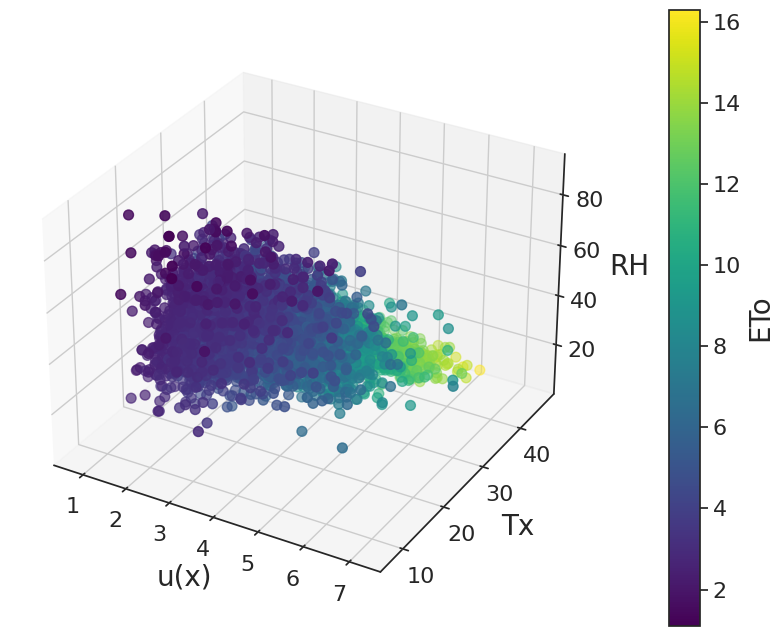

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files  # Import the files module for Colab

# Assuming you have a DataFrame 'df' containing your data
# Replace 'u_x', 'Tx', 'RH', and 'ETo' with your actual column names

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['u(x)']
y = df['Tx']
z = df['RH']
c = df['ETo']  # Color the points based on 'ETo'

# Create a 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=50)

# Set axis labels with adjusted labelpad
ax.set_xlabel('u(x)', labelpad=10)
ax.set_ylabel('Tx', labelpad=10)
ax.set_zlabel('RH', labelpad=10)
#ax.set_title('3D Scatter Plot of u(x), Tx, RH vs. ETo')

# Add a colorbar to show the mapping of 'ETo' values with adjusted labelpad
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('ETo')

# Save the plot as an image
plt.savefig('3d_scatter_plot.png', dpi=300, bbox_inches='tight')

# Use the Colab files module to download the saved plot with a browse option
files.download('3d_scatter_plot.png')

plt.show()



In [57]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming you have already defined df1, df3, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results for each model with all features
results_all_features = {}

# Convert X_train to a NumPy array to simplify indexing
X_train_np = X_train.to_numpy()

# Perform 10-fold cross-validation for each model with all features
for model_name, model in [('Random Forest', random_forest_model), ('XGBoost', xgb_model), ('LightGBM', lgbm_model), ('Decision Tree', decision_tree_model)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train_np):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model with all features
    results_all_features[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results for the models with all features
for model_name, metrics in results_all_features.items():
    print(f"Model: {model_name} (All Features)")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")

# Train models with only the subset of features 'u(x)', 'Tx', 'RH'
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_subset = df[['u(x)', 'Tx', 'RH']]  # Subset of features: 'u(x)', 'Tx', 'RH'
y = df['ETo']  # Target: 'ETo'
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models for the subset of features
random_forest_model_subset = RandomForestRegressor()
xgb_model_subset = XGBRegressor()
lgbm_model_subset = LGBMRegressor()
decision_tree_model_subset = DecisionTreeRegressor()

# Create a dictionary to store results for each model with the subset of features
results_subset = {}

# Convert X_train_subset to a NumPy array to simplify indexing
X_train_subset_np = X_train_subset.to_numpy()

# Perform 10-fold cross-validation for each model with the subset of features
for model_name, model in [('Random Forest', random_forest_model_subset), ('XGBoost', xgb_model_subset), ('LightGBM', lgbm_model_subset), ('Decision Tree', decision_tree_model_subset)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train_subset_np):
        X_train_fold, X_val_fold = X_train_subset_np[train_index], X_train_subset_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model with the subset of features
    results_subset[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results for the models with the subset of features
for model_name, metrics in results_subset.items():
    print(f"Model: {model_name} (Subset Features)")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 33.290513
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 33.274342
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] S

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Sta

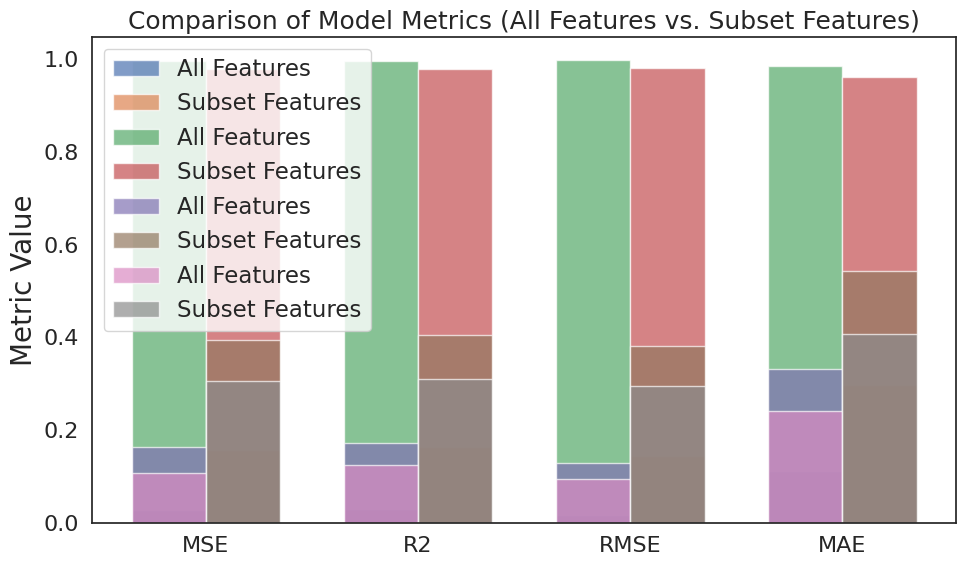

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Assuming you have already defined df and X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results for each model with all features
results = {}

# Perform 10-fold cross-validation for each model with all features
for model_name, model in [('Random Forest', random_forest_model), ('XGBoost', xgb_model), ('LightGBM', lgbm_model), ('Decision Tree', decision_tree_model)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model
    results[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results for the models with all features
for model_name, metrics in results.items():
    print(f"Model: {model_name} (All Features)")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")

# Train models with only the subset of features 'u(x)', 'Tx', 'RH'
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_subset = df[['u(x)', 'Tx', 'RH']]  # Subset of features: 'u(x)', 'Tx', 'RH'
y = df['ETo']  # Target: 'ETo'
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models for the subset of features
random_forest_model_subset = RandomForestRegressor()
xgb_model_subset = XGBRegressor()
lgbm_model_subset = LGBMRegressor()
decision_tree_model_subset = DecisionTreeRegressor()

# Create a dictionary to store results for each model with the subset of features
results_subset = {}

# Perform 10-fold cross-validation for each model with the subset of features
for model_name, model in [('Random Forest', random_forest_model_subset), ('XGBoost', xgb_model_subset), ('LightGBM', lgbm_model_subset), ('Decision Tree', decision_tree_model_subset)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train_subset):
        X_train_fold, X_val_fold = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model with the subset of features
    results_subset[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results for the models with the subset of features
for model_name, metrics in results_subset.items():
    print(f"Model: {model_name} (Subset Features)")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")

# Create bar plots to compare metrics between all features and subset
metrics_names = ['MSE', 'R2', 'RMSE', 'MAE']
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics_names):
    # Plot bars for models with all features and models with the subset of features
    ax.bar(x - width/2, [np.mean(results[model_name][metric]) for model_name in results], width, label='All Features', align='center', alpha=0.7)
    ax.bar(x + width/2, [np.mean(results_subset[model_name][metric]) for model_name in results_subset], width, label='Subset Features', align='center', alpha=0.7)

ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Model Metrics (All Features vs. Subset Features)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.show()



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Sta

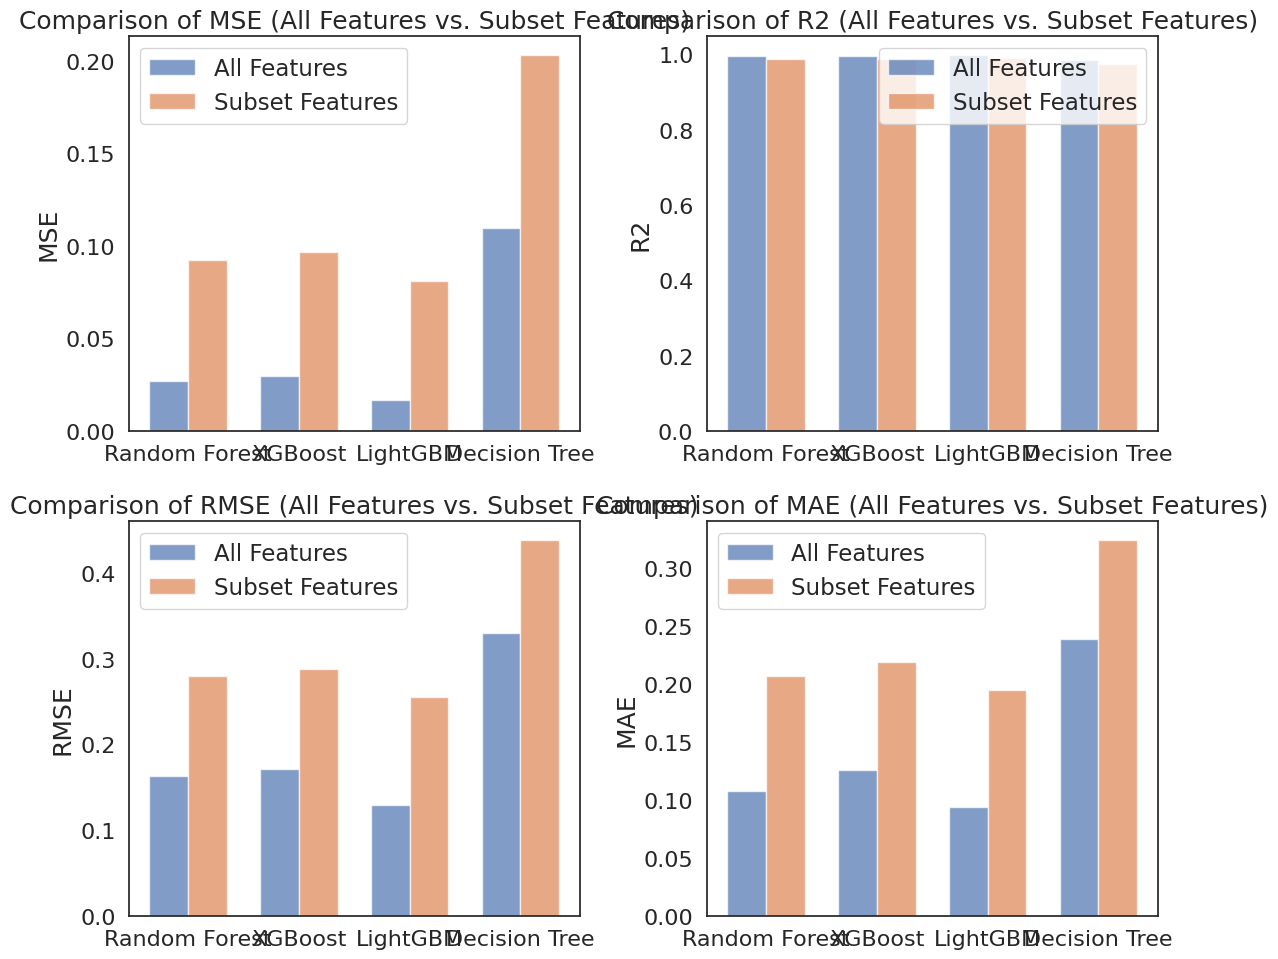

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Assuming you have already defined df, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# List of metrics to plot
metrics_names = ['MSE', 'R2', 'RMSE', 'MAE']

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Create separate bars for full vs. subset features for each metric
for i, metric in enumerate(metrics_names):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axes[row, col]  # Select the appropriate subplot

    # Create a list to store metric values for full and subset features
    full_features_values = []
    subset_features_values = []

    # Perform 10-fold cross-validation for each model with all features
    for model_name, model in [('Random Forest', random_forest_model), ('XGBoost', xgb_model), ('LightGBM', lgbm_model), ('Decision Tree', decision_tree_model)]:
        mse_scores = []
        r2_scores = []
        rmse_scores = []
        mae_scores = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for full features
        full_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Train models with only the subset of features 'u(x)', 'Tx', 'RH'
        X_subset = df[['u(x)', 'Tx', 'RH']]  # Subset of features: 'u(x)', 'Tx', 'RH'
        y = df['ETo']  # Target: 'ETo'

        # Split the data into training and testing sets (e.g., 80% train, 20% test)
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=0)

        # Convert the y_train and y_test DataFrames to 1D arrays
        y_train_subset = y_train_subset.values.ravel()
        y_test_subset = y_test_subset.values.ravel()

        # Perform 10-fold cross-validation for each model with the subset of features
        for train_index, val_index in kf.split(X_train_subset):
            X_train_fold, X_val_fold = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
            y_train_fold, y_val_fold = y_train_subset[train_index], y_train_subset[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for subset features
        subset_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Append the metric values to the lists
        full_features_values.append(full_features_value)
        subset_features_values.append(subset_features_value)

    # Create separate bars for full vs. subset features for the current metric
    x = np.arange(len(full_features_values))
    width = 0.35
    ax.bar(x - width/2, full_features_values, width, label='All Features', align='center', alpha=0.7)
    ax.bar(x + width/2, subset_features_values, width, label='Subset Features', align='center', alpha=0.7)
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric} (All Features vs. Subset Features)')
    ax.set_xticks(x)
    ax.set_xticklabels(['Random Forest', 'XGBoost', 'LightGBM', 'Decision Tree'])
    ax.legend()

plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

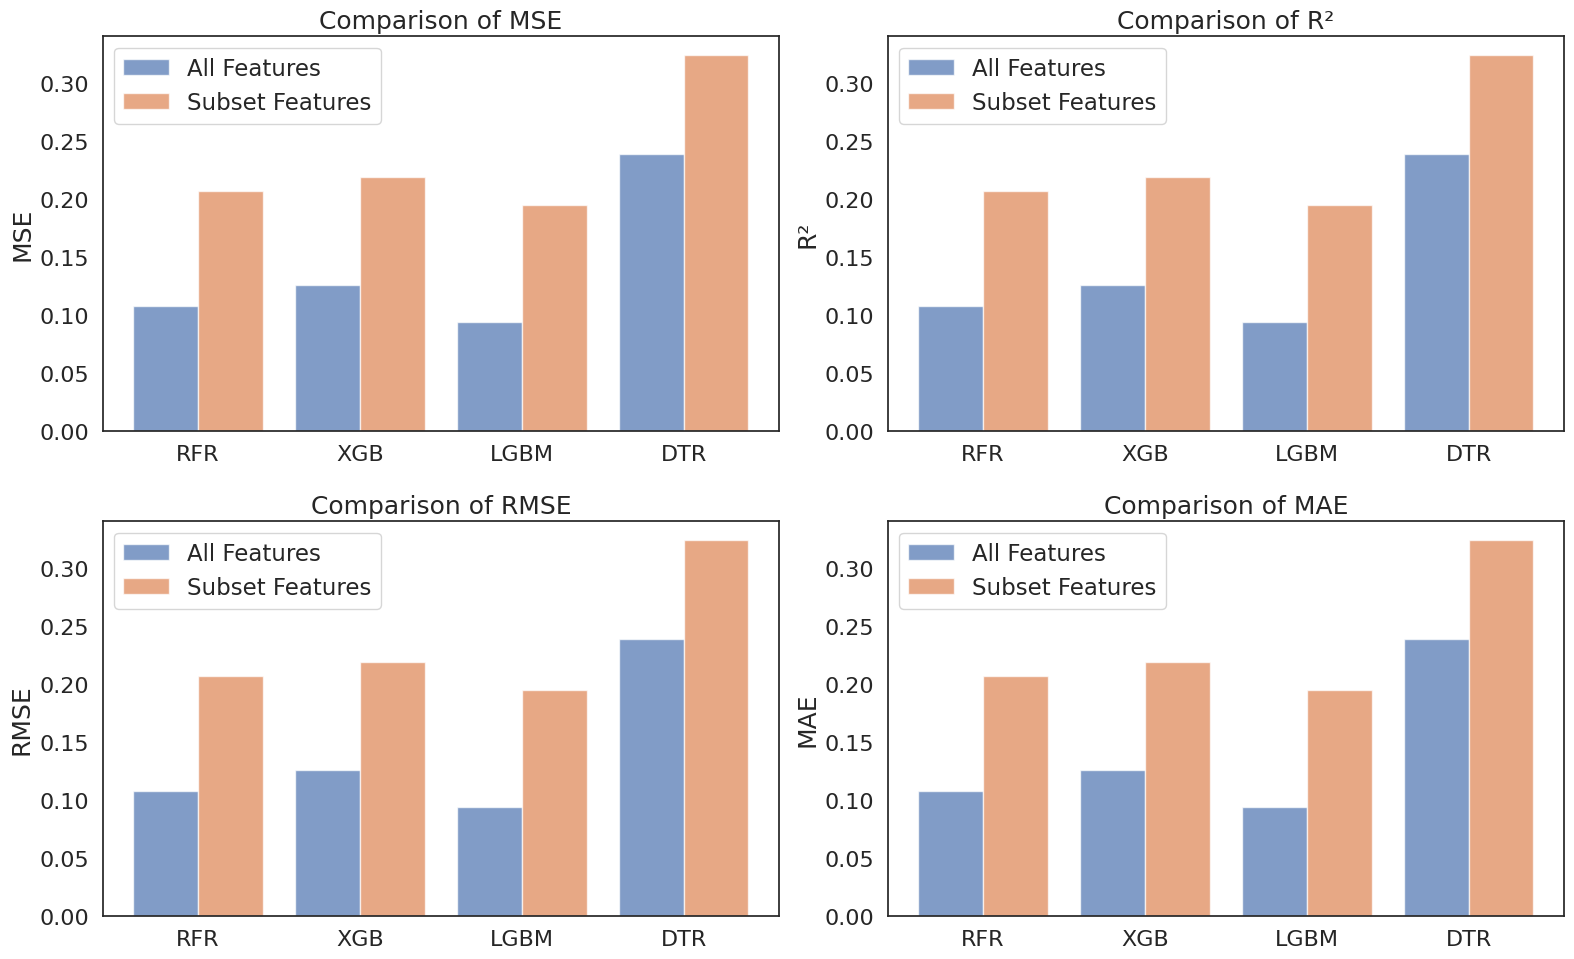

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for data and models)

# Create a new figure for displaying results
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

# List of metrics to display
metrics_names = ['MSE', 'R2', 'RMSE', 'MAE']

# Iterate over each metric and create a subplot
for i, metric in enumerate(metrics_names):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axes[row, col]  # Select the appropriate subplot

    x_values = np.arange(len(['RFR', 'XGB', 'LGBM', 'DTR']))  # X-axis positions

    # Plot metric values for full features and subset features with small offsets
    ax.bar(x_values - 0.2, full_features_values, label='All Features', width=0.4, align='center', alpha=0.7)
    ax.bar(x_values + 0.2, subset_features_values, label='Subset Features', width=0.4, align='center', alpha=0.7)

    if metric == 'R2':
        ax.set_ylabel('R²')
        ax.set_title('Comparison of R²')
    else:
        ax.set_ylabel(metric)
        ax.set_title(f'Comparison of {metric}')

    ax.set_xticks(x_values)
    ax.set_xticklabels(['RFR', 'XGB', 'LGBM', 'DTR'])
    ax.legend()

plt.tight_layout()
plt.savefig('final_comparison_plot.png')

# Download the saved figure
from google.colab import files
files.download('final_comparison_plot.png')
plt.show()



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 3
[LightGBM] [Info] Start tra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

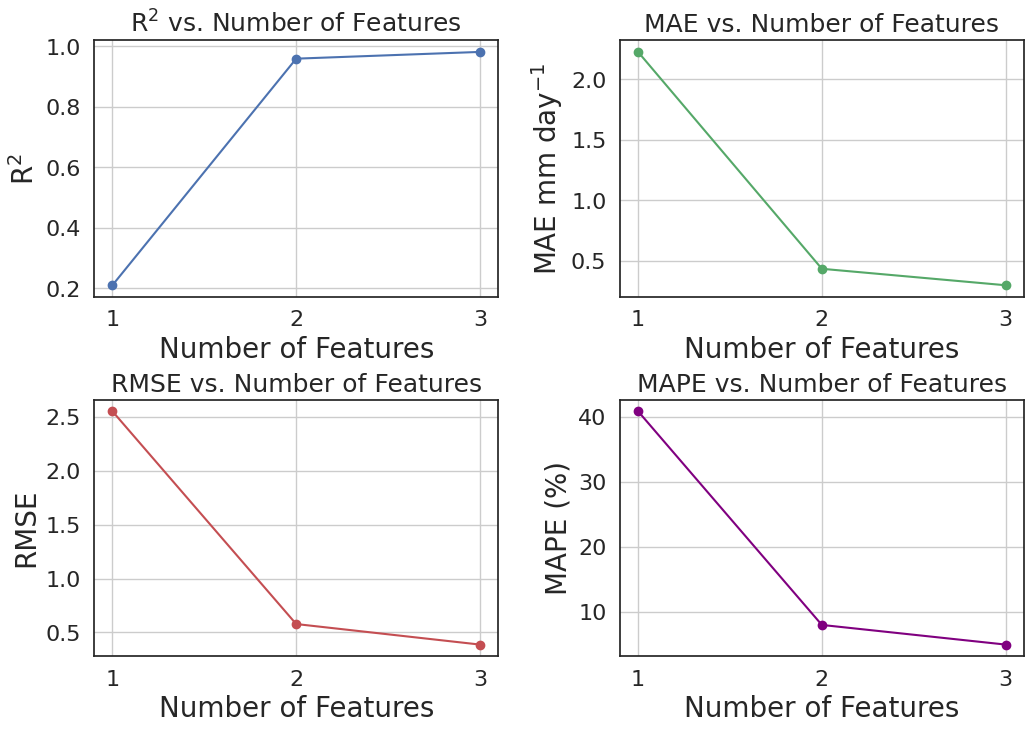

In [62]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define the feature names to use in the combination (without 'Ra')
selected_features = ['u(x)', 'Tx', 'RH']

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Initialize empty lists to store evaluation metric values for each feature subset
r2_values = []
mae_values = []
rmse_values = []
mape_values = []

# Iterate through different feature subsets
for i in range(1, len(selected_features) + 1):
    feature_subset = selected_features[:i]  # Subset of features from index 0 to i
    X_train_subset = X_train[feature_subset]
    X_test_subset = X_test[feature_subset]

    # Fit the model to the training data with the current feature subset
    lgbm_model.fit(X_train_subset, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test_subset)

    # Calculate evaluation metrics for the current feature subset
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Append metric values to the respective lists
    r2_values.append(r2)
    mae_values.append(mae)
    rmse_values.append(rmse)
    mape_values.append(mape)

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

# Increase font size of ticks and labels
plt.rcParams.update({'font.size': 20})  # Increase font size for ticks
plt.rcParams['axes.labelsize'] = 18  # Increase font size for labels

# Plot R-squared (R2) values
axes[0, 0].plot(range(1, len(selected_features) + 1), r2_values, marker='o', linestyle='-', color='b')
axes[0, 0].set_xlabel('Number of Features')
axes[0, 0].set_ylabel('R$^2$')
axes[0, 0].set_title('R$^2$ vs. Number of Features')
axes[0, 0].grid(True)

# Plot Mean Absolute Error (MAE) values
axes[0, 1].plot(range(1, len(selected_features) + 1), mae_values, marker='o', linestyle='-', color='g')
axes[0, 1].set_xlabel('Number of Features')
axes[0, 1].set_ylabel('MAE mm day$^{-1}$')
axes[0, 1].set_title('MAE vs. Number of Features')
axes[0, 1].grid(True)

# Plot Root Mean Squared Error (RMSE) values
axes[1, 0].plot(range(1, len(selected_features) + 1), rmse_values, marker='o', linestyle='-', color='r')
axes[1, 0].set_xlabel('Number of Features')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_title('RMSE vs. Number of Features')
axes[1, 0].grid(True)

# Plot Mean Absolute Percentage Error (MAPE) values
axes[1, 1].plot(range(1, len(selected_features) + 1), mape_values, marker='o', linestyle='-', color='purple')
axes[1, 1].set_xlabel('Number of Features')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_title('MAPE vs. Number of Features')
axes[1, 1].grid(True)

# Set X-axis ticks to whole numbers
axes[0, 0].set_xticks(range(1, len(selected_features) + 1))
axes[0, 1].set_xticks(range(1, len(selected_features) + 1))
axes[1, 0].set_xticks(range(1, len(selected_features) + 1))
axes[1, 1].set_xticks(range(1, len(selected_features) + 1))

# Save the image with higher DPI (dots per inch) for better resolution
plt.savefig('evaluation_metrics.png', dpi=300, bbox_inches='tight')

# Optionally, you can download the image to your computer with a browse option:
from google.colab import files
files.download('evaluation_metrics.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

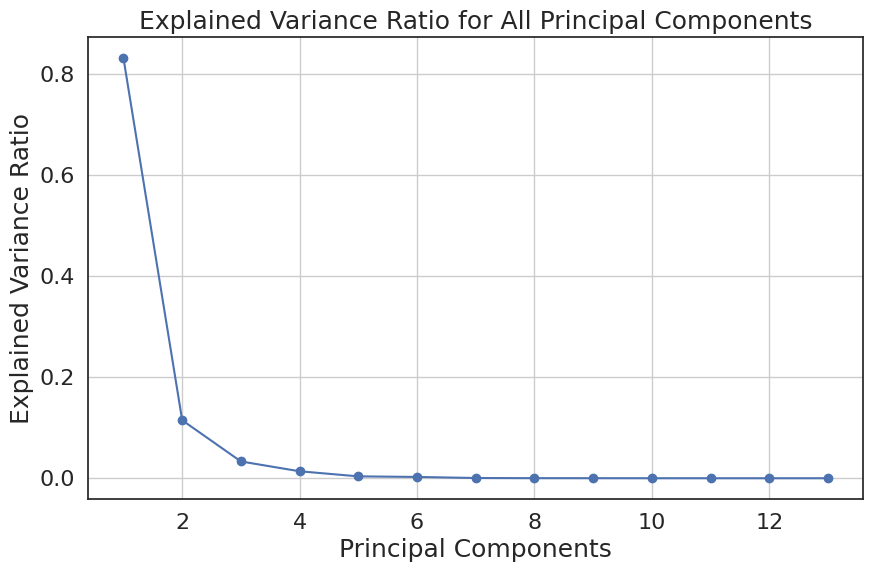

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Create a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Increase the font size
plt.rcParams.update({'font.size': 18})

# Plot the explained variance ratio for all components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for All Principal Components')

# Enable grid lines
plt.grid(True)

# Save the figure with higher DPI (dots per inch) for better resolution
plt.savefig('explained_variance_ratio.png', dpi=300, bbox_inches='tight')

# Download the figure to your computer with a browse option
files.download('explained_variance_ratio.png')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

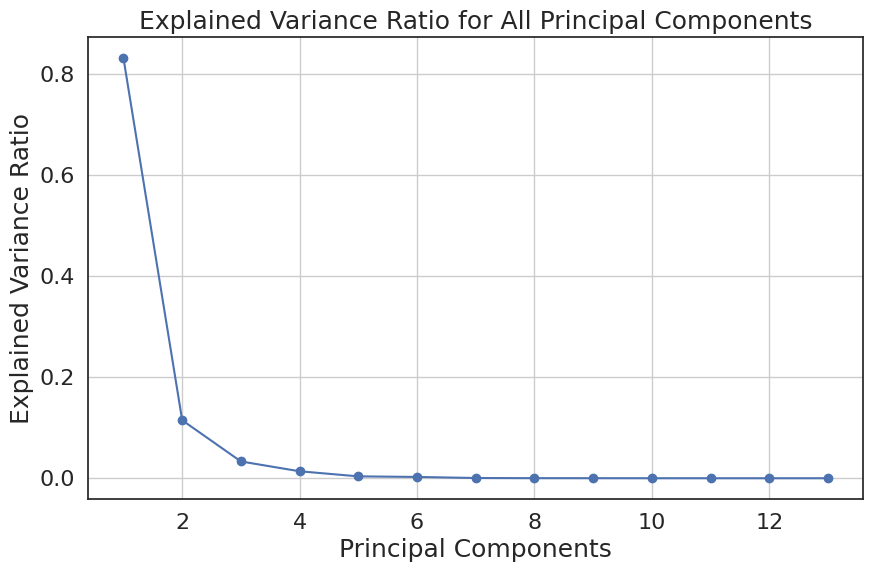

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Create a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Increase the font size
plt.rcParams.update({'font.size': 18})

# Plot the explained variance ratio for all components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for All Principal Components')

# Enable grid lines
plt.grid(True)

# Save the figure with higher DPI (dots per inch) for better resolution
plt.savefig('explained_variance_ratio.png', dpi=300, bbox_inches='tight')

# Download the figure to your computer with a browse option
files.download('explained_variance_ratio.png')

# Show the plot
plt.show()
